# Logistic Regression Model on Wine Dataset

In [2]:
#library importing
from matplotlib import pyplot
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

## Data Load

In [5]:
df = pd.read_csv("wine.csv")

## Exploratory Data Analysis


In [8]:
df #Seeing the dataset

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
type(df) #Type checking

pandas.core.frame.DataFrame

In [12]:
df.info() #Checking am i have any missing point in unseen part of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [14]:
df.head() #Show the first five index of data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
df.tail()  #Show the last five index of data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [18]:
df.describe() #Show statistical informations about the data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [22]:
df['Wine'].value_counts() #I wanted to see numbers of class members

Wine
2    71
1    59
3    48
Name: count, dtype: int64

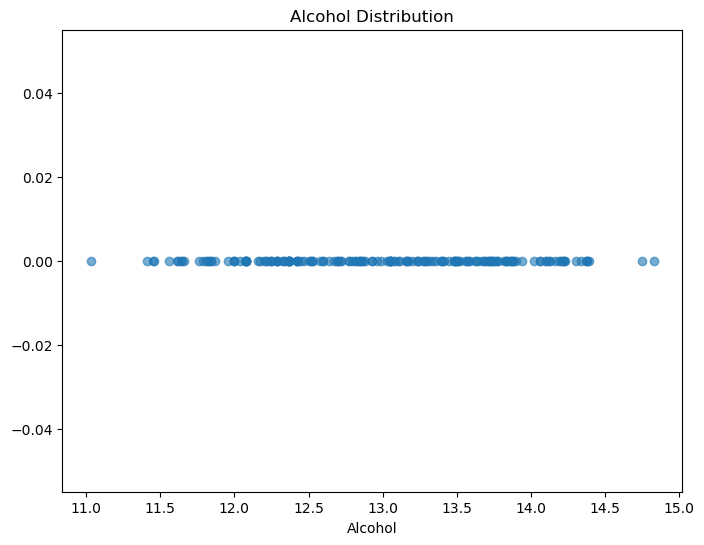

In [24]:
#Scatter Plot 1
plt.figure(figsize=(8, 6)) 
plt.scatter(df.Alcohol, np.zeros_like(df.Alcohol), alpha=0.6)
plt.title('Alcohol Distribution')
plt.xlabel('Alcohol')
plt.ylabel('')
plt.show()

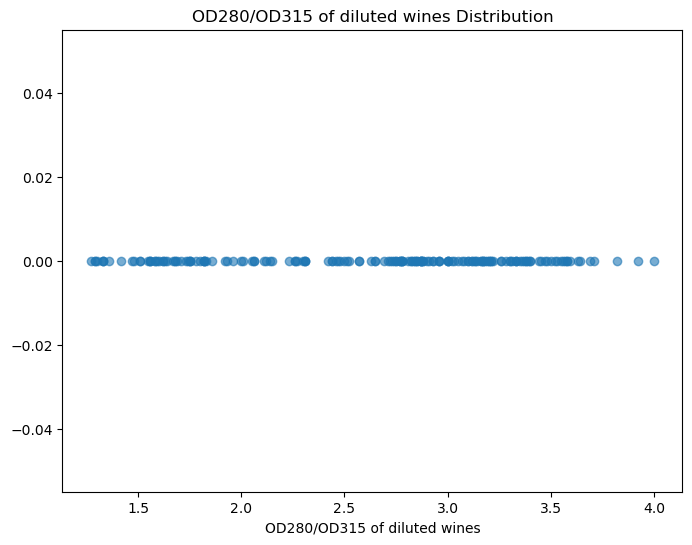

In [28]:
#Scatter Plot 2
plt.figure(figsize=(8, 6))
plt.scatter(df["OD"], np.zeros_like(df["OD"]), alpha=0.6)
plt.title('OD280/OD315 of diluted wines Distribution')
plt.xlabel('OD280/OD315 of diluted wines')
plt.ylabel('')
plt.show()

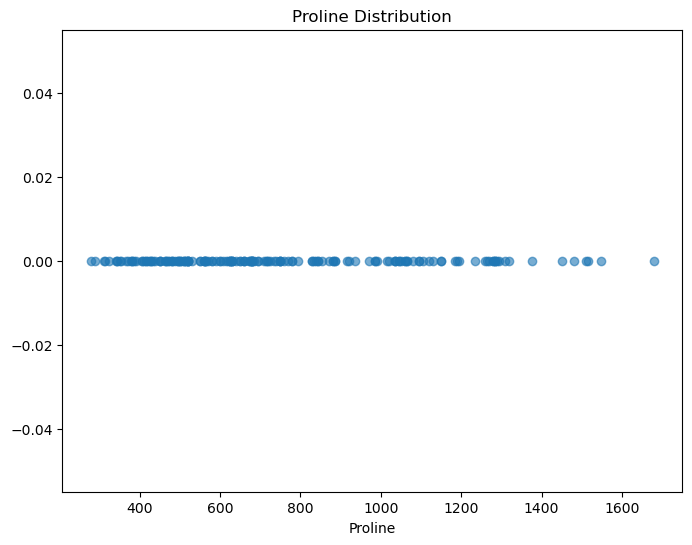

In [30]:
#Scatter Plot 3
plt.figure(figsize=(8, 6))
plt.scatter(df.Proline, np.zeros_like(df.Proline), alpha=0.6)
plt.title('Proline Distribution')
plt.xlabel('Proline')
plt.ylabel('')
plt.show()

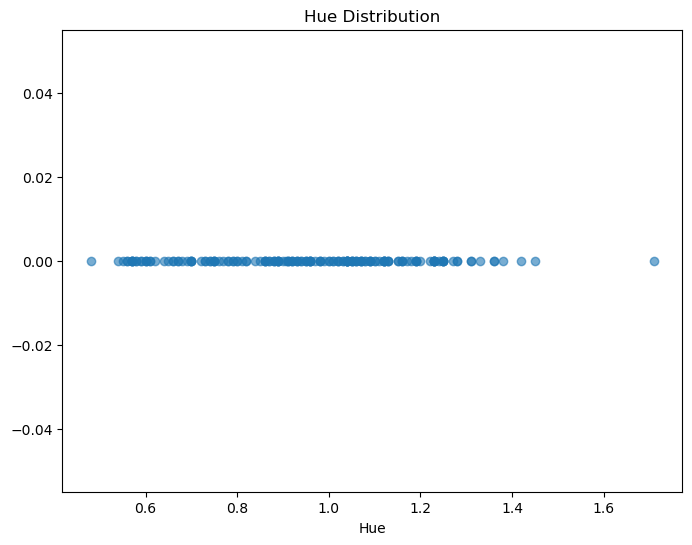

In [32]:
#Scatter Plot 4
plt.figure(figsize=(8, 6))
plt.scatter(df.Hue, np.zeros_like(df.Hue), alpha=0.6)
plt.title('Hue Distribution')
plt.xlabel('Hue')
plt.ylabel('')
plt.show()

<Figure size 800x600 with 0 Axes>

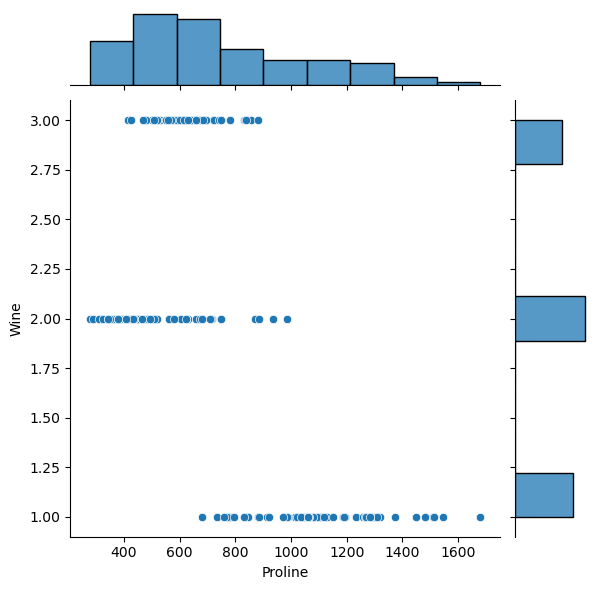

In [34]:
#Joint Plot 1
plt.figure(figsize=(8, 6))
sns.jointplot(x=df["Proline"], y=df.Wine)

<Figure size 800x600 with 0 Axes>

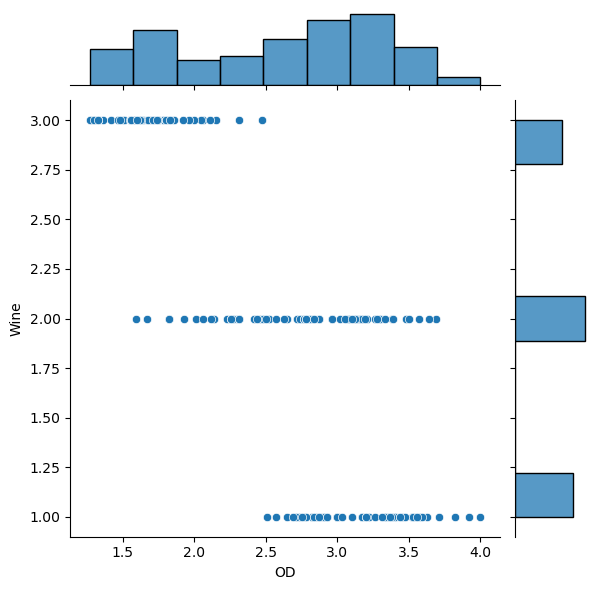

In [36]:
#Joint Plot 2
plt.figure(figsize=(8, 6))
sns.jointplot(x=df["OD"], y=df.Wine)

<Figure size 800x600 with 0 Axes>

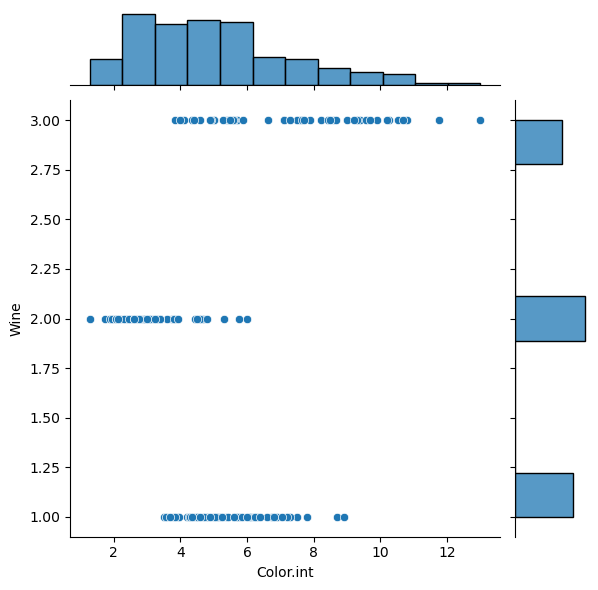

In [40]:
#Joint Plot 3
plt.figure(figsize=(8, 6))
sns.jointplot(x=df["Color.int"], y=df.Wine)

<Figure size 800x600 with 0 Axes>

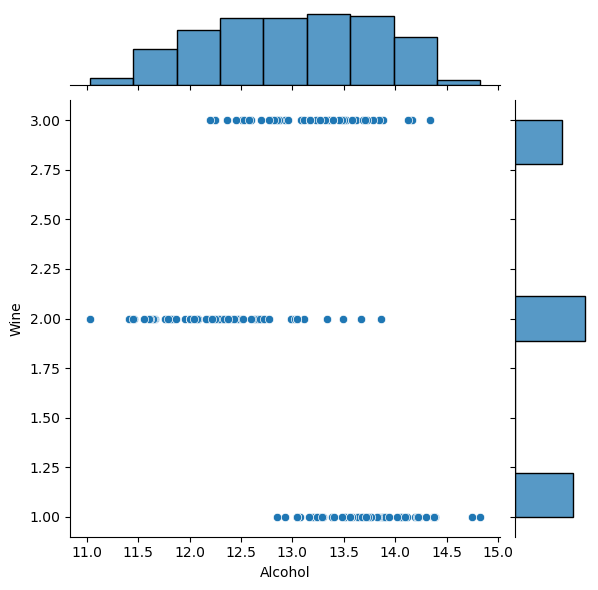

In [42]:
#Joint Plot 4
plt.figure(figsize=(8, 6))
sns.jointplot(x=df["Alcohol"], y=df.Wine)

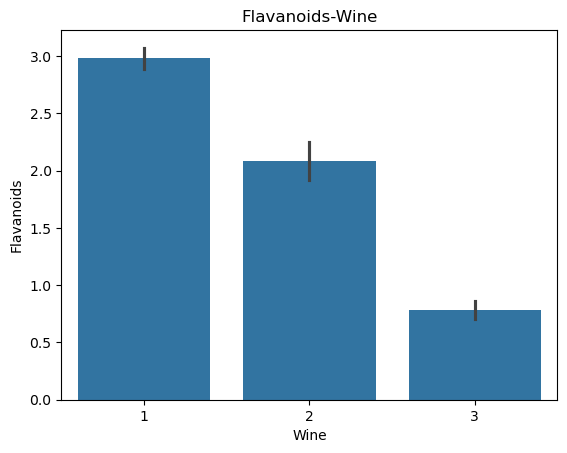

In [44]:
#Bar Plot 1
sns.barplot(x='Wine', y='Flavanoids', data=df)

plt.title("Flavanoids-Wine")
plt.xlabel("Wine")
plt.ylabel("Flavanoids")

plt.show()

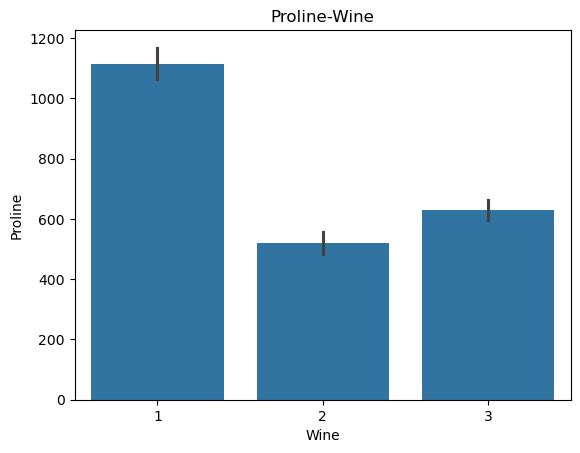

In [46]:
#Bar Plot 2
sns.barplot(x='Wine', y='Proline', data=df)

plt.title("Proline-Wine")
plt.xlabel("Wine")
plt.ylabel("Proline")

plt.show()

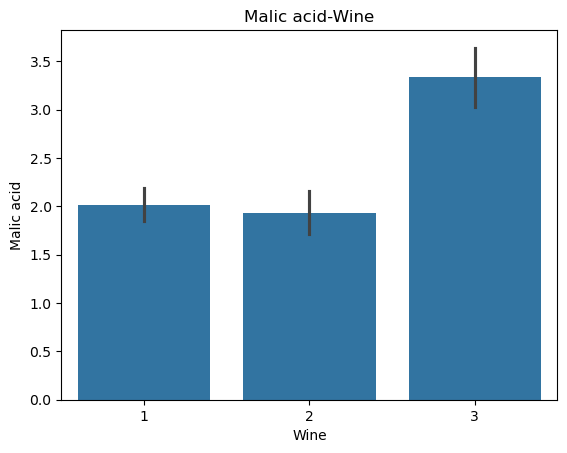

In [50]:
#Bar Plot 3
sns.barplot(x='Wine', y='Malic.acid', data=df)

plt.title("Malic acid-Wine")
plt.xlabel("Wine")
plt.ylabel("Malic acid")

plt.show()

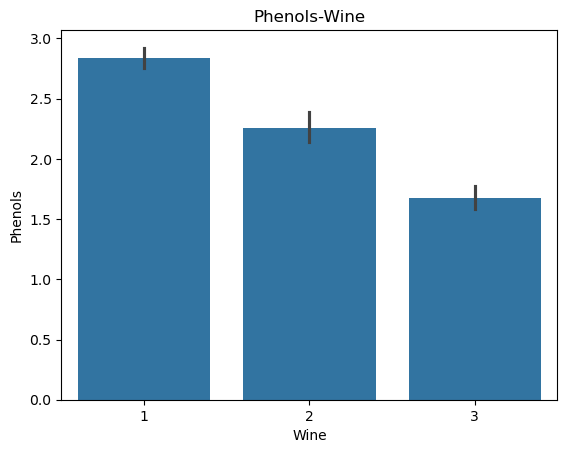

In [54]:
#Bar Plot 4
sns.barplot(x='Wine', y='Phenols', data=df)

plt.title("Phenols-Wine")
plt.xlabel("Wine")
plt.ylabel("Phenols")

plt.show()

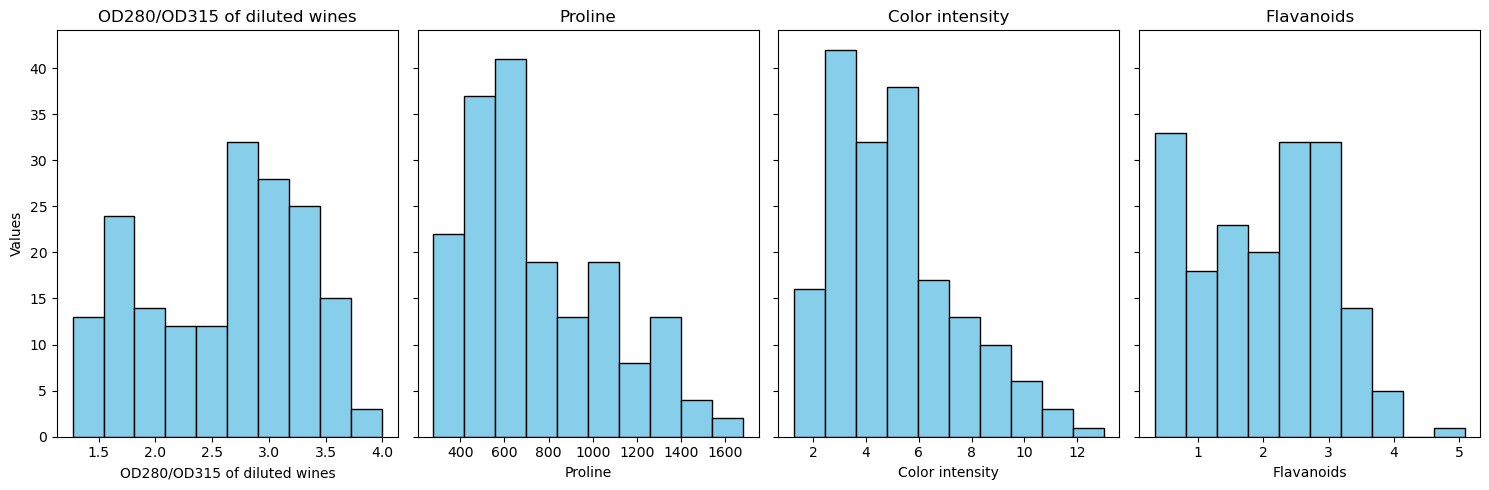

In [56]:
#Histograms four of them together
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

axes[0].hist(df["OD"], bins=10, color="skyblue", edgecolor="black")
axes[0].set_title("OD280/OD315 of diluted wines")
axes[0].set_xlabel("OD280/OD315 of diluted wines")
axes[0].set_ylabel("Values")

axes[1].hist(df["Proline"], bins=10, color="skyblue", edgecolor="black")
axes[1].set_title("Proline")
axes[1].set_xlabel("Proline")

axes[2].hist(df["Color.int"], bins=10, color="skyblue", edgecolor="black")
axes[2].set_title("Color intensity")
axes[2].set_xlabel("Color intensity")

axes[3].hist(df["Flavanoids"], bins=10, color="skyblue", edgecolor="black")
axes[3].set_title("Flavanoids")
axes[3].set_xlabel("Flavanoids")

plt.tight_layout()
plt.show()

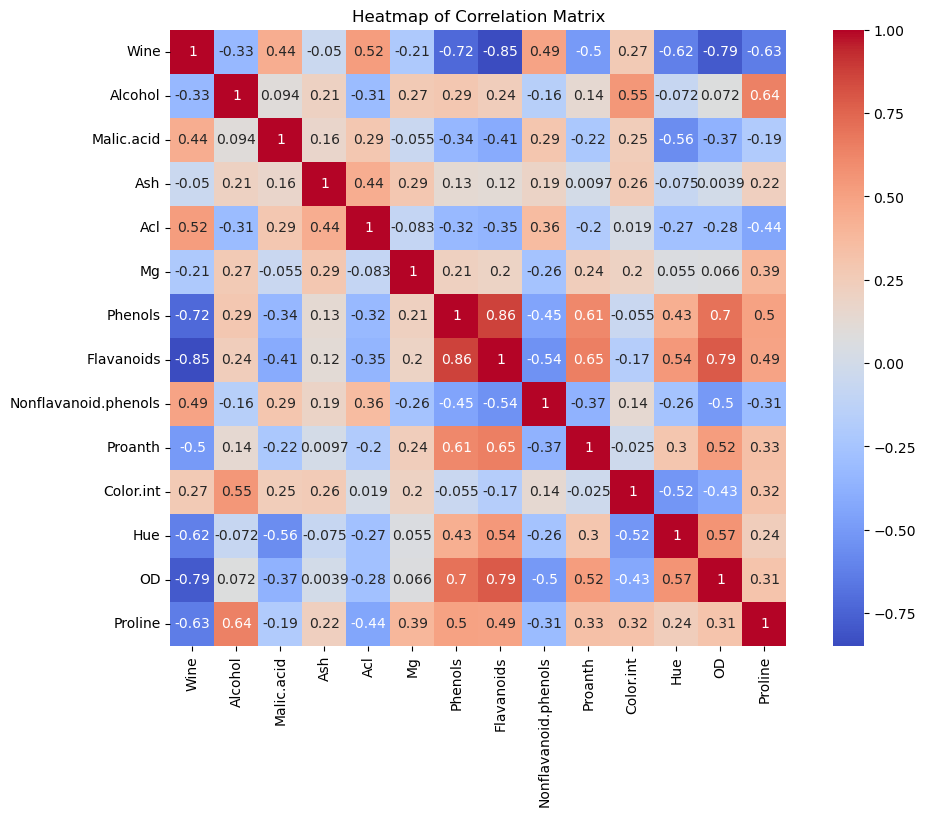

In [58]:
#Show how relate the features each other
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, square=True)

plt.title("Heatmap of Correlation Matrix")
plt.show()

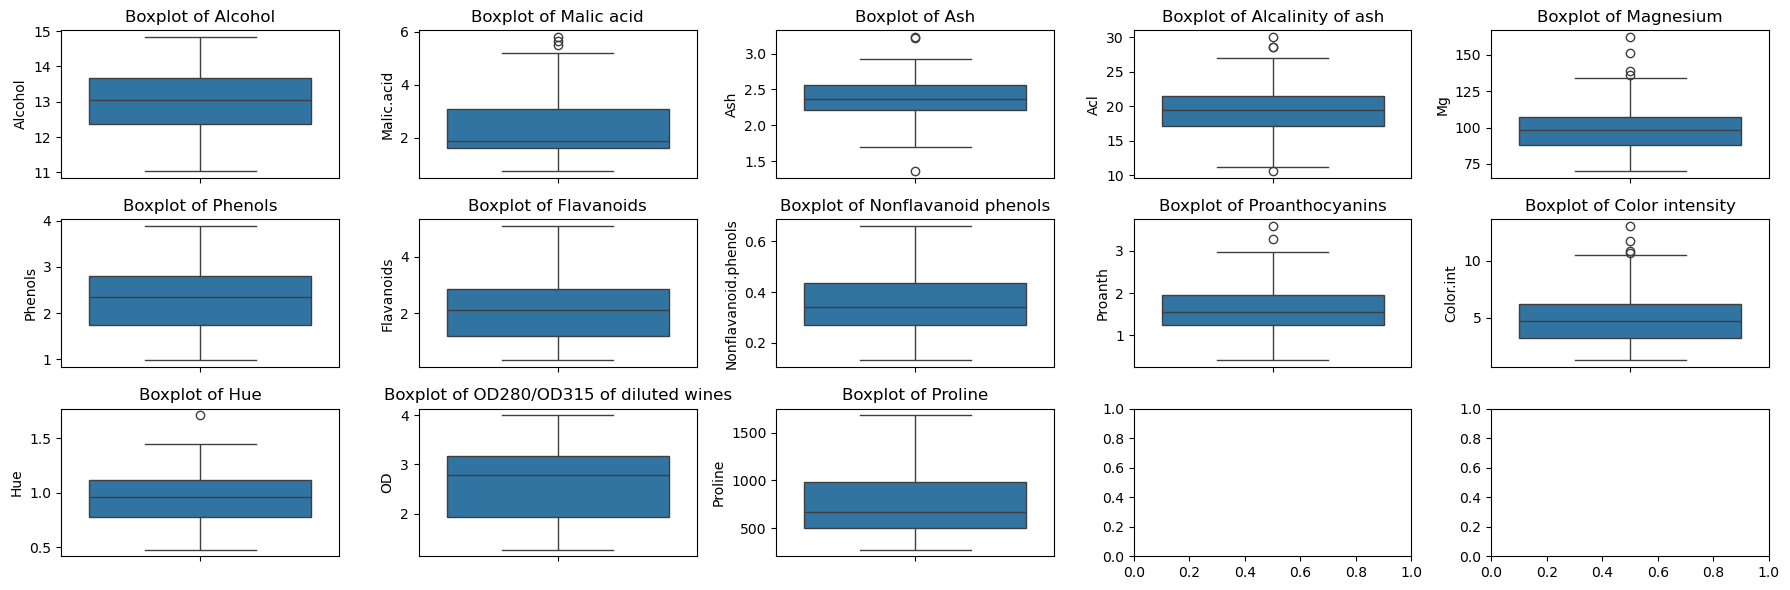

In [64]:
#Box Plots of features to see outliers according to IQR, All together. 
#I added features' name below for the gaining speed

#Alcohol	Malic acid	-Ash -Alcalinity of ash	 -Magnesium	-Total phenols	-Flavanoids	-Nonflavanoid phenols	
#Proanthocyanins	-Color intensity	-Hue	-OD280/OD315 of diluted wines	-Proline
fig, axes = plt.subplots(3, 5, figsize=(18, 6))
sns.boxplot(data=df["Alcohol"], ax=axes[0, 0])
axes[0, 0].set_title("Boxplot of Alcohol")

sns.boxplot(data=df["Malic.acid"], ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Malic acid")

sns.boxplot(data=df["Ash"], ax=axes[0, 2])
axes[0, 2].set_title("Boxplot of Ash")

sns.boxplot(data=df["Acl"], ax=axes[0, 3])
axes[0, 3].set_title("Boxplot of Alcalinity of ash")

sns.boxplot(data=df["Mg"], ax=axes[0, 4])
axes[0, 4].set_title("Boxplot of Magnesium")

sns.boxplot(data=df["Phenols"], ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Phenols")

sns.boxplot(data=df["Flavanoids"], ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of Flavanoids")

sns.boxplot(data=df["Nonflavanoid.phenols"], ax=axes[1, 2])
axes[1, 2].set_title("Boxplot of Nonflavanoid phenols")

sns.boxplot(data=df["Proanth"], ax=axes[1, 3])
axes[1, 3].set_title("Boxplot of Proanthocyanins")

sns.boxplot(data=df["Color.int"], ax=axes[1, 4])
axes[1, 4].set_title("Boxplot of Color intensity")

sns.boxplot(data=df["Hue"], ax=axes[2, 0])
axes[2, 0].set_title("Boxplot of Hue")

sns.boxplot(data=df["OD"], ax=axes[2, 1])
axes[2, 1].set_title("Boxplot of OD280/OD315 of diluted wines")

sns.boxplot(data=df["Proline"], ax=axes[2, 2])
axes[2, 2].set_title("Boxplot of Proline")

plt.tight_layout()
plt.show()

## Outlier Cleaning

In [67]:
#I defined a function for remove outliers according to IQR. No need to write the same codes again and again 
def outlier_cleaner(df, columnName):
    Q1 = df[columnName].quantile(0.25)
    Q3 = df[columnName].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df_cleaned = df[(df[columnName] >= lower_limit) & (df[columnName] <= upper_limit)]
    
    return df_cleaned

In [69]:
#On the boxplots, outliers are pointed and i removed the outliers one by one each cell with calling my function.
#Also i wanted to see whether the outliers are removed or not so why i used .shape
#Removing outliers from Malic acid
df = outlier_cleaner(df, 'Malic.acid')
df.shape

(175, 14)

In [71]:
#Removing outliers from Ash
df = outlier_cleaner(df, 'Ash')
df.shape

(172, 14)

In [73]:
#Removing outliers from Alcalinity of ash
df = outlier_cleaner(df, 'Acl')
df.shape

(170, 14)

In [75]:
#Removing outliers from Magnesium
df = outlier_cleaner(df, 'Mg')
df.shape

(167, 14)

In [77]:
#Removing outliers from Proanthocyanins
df = outlier_cleaner(df, 'Proanth')
df.shape

(165, 14)

In [79]:
#Removing outliers from Color intensity
df = outlier_cleaner(df, 'Color.int')
df.shape

(162, 14)

In [81]:
#Removing outliers from Hue
df = outlier_cleaner(df, 'Hue')
df.shape

(161, 14)

In [83]:
df #to see df's new 

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [85]:
#I removed the outliers but the indexes remained the same. Using reset_index fixes the indexes.
df = df.reset_index(drop=True)
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
157,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
158,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
159,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Preprocessing

In [88]:
#I assigned all features to X, target column to y.
X = df.drop('Wine', axis=1)
y = df['Wine']

In [90]:
#I used Z-Score Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
#I assingned scaled X values to new dataframe because of do not miss to original dataframe.
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [94]:
#Assign Class column to new scaled dataframe
df_scaled = pd.concat([df_scaled, y], axis=1)

In [96]:
#see the new dataframe
df_scaled

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,1.515163,-0.579166,0.270936,-1.248144,2.298023,0.828643,1.055948,-0.650569,1.466583,0.282097,0.383333,1.828097,0.982174,1
1,0.209648,-0.512507,-0.931537,-2.732175,0.114047,0.589411,0.749315,-0.815257,-0.505150,-0.304357,0.429479,1.096928,0.934830,1
2,0.158948,0.039806,1.266087,-0.236305,0.194935,0.828643,1.239928,-0.485881,2.481732,0.300715,0.337186,0.773526,1.360929,1
3,1.692612,-0.350622,0.561189,-0.843409,1.165591,2.503264,1.495455,-0.979945,1.251840,1.287448,-0.447308,1.167233,2.292034,1
4,0.260347,0.258826,2.095379,0.573166,1.570031,0.828643,0.677767,0.255215,0.549044,-0.332284,0.383333,0.436064,-0.059401,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.426439,0.182645,0.478259,0.235886,-0.613945,-0.957620,-1.356232,0.666936,-0.583238,2.171785,-1.554828,-1.279371,-0.296123,3
157,0.463146,1.515815,0.478259,1.247725,0.275823,-0.766235,-1.305127,0.584592,-0.251362,1.054728,-1.185655,-1.490285,-0.012057,3
158,0.298372,1.868152,-0.433962,0.235886,1.731807,-1.101159,-1.366453,0.584592,-0.368495,2.404505,-1.693268,-1.490285,0.256228,3
159,0.171623,0.258826,0.022149,0.235886,1.731807,-1.005466,-1.376675,1.408032,-0.153752,1.985609,-1.647122,-1.405919,0.272009,3


In [98]:
#Check any missing values or something
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  161 non-null    int64  
 1   Alcohol               161 non-null    float64
 2   Malic.acid            161 non-null    float64
 3   Ash                   161 non-null    float64
 4   Acl                   161 non-null    float64
 5   Mg                    161 non-null    int64  
 6   Phenols               161 non-null    float64
 7   Flavanoids            161 non-null    float64
 8   Nonflavanoid.phenols  161 non-null    float64
 9   Proanth               161 non-null    float64
 10  Color.int             161 non-null    float64
 11  Hue                   161 non-null    float64
 12  OD                    161 non-null    float64
 13  Proline               161 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 17.7 KB


In [122]:
#Assingning to test and train values to build model. Also see the dimensions of train and test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, test_size= 0.2, random_state = 1)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (128, 13)
X_test dimension=  (33, 13)
y_train dimension=  (128,)
y_train dimension=  (33,)


# Modelling

In [125]:
lm = LogisticRegression(solver="sag", max_iter=5000, random_state=42)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42, solver='sag')

In [127]:
print("Training Accuracy:", lm.score(X_train, y_train))
print("Test Accuracy:", lm.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.9696969696969697


In [129]:
#Making prediction on test set
y_pred = lm.predict(X_test)

In [131]:
#Classification report to see my model's performance
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report

,precision,recall,f1-score,support
1,1.000000,1.000000,1.000000,14.000000
2,1.000000,0.923077,0.960000,13.000000
3,0.857143,1.000000,0.923077,6.000000
accuracy,0.969697,0.969697,0.969697,0.969697
macro avg,0.952381,0.974359,0.961026,33.000000
weighted avg,0.974026,0.969697,0.970256,33.000000


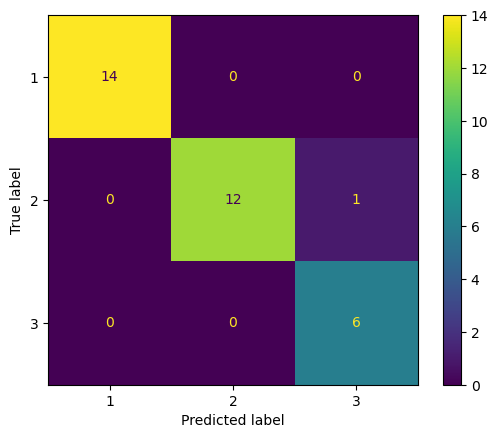

In [133]:
#Confusion matrix to see how my model predicted to classes of wines
predictions = lm.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=lm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lm.classes_)
disp.plot()

## GridSearch

In [136]:
#to find best parameters, i applied GridSearchCV
param_grid = {
    'solver': ['sag', 'saga', 'lbfgs'],
    'max_iter': [1000, 5000, 10000],
    'C': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=10)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'max_iter': 1000, 'solver': 'sag'}


# Re-Building the model with the Best Parameters

In [139]:
#With using the best parameters, i rebuilded the model
lm_wBestParameters = LogisticRegression(solver="sag", max_iter=1000, C=0.01 , random_state=42)
lm_wBestParameters.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='sag')

In [141]:
#Show the accuracy score
print("Training Accuracy:", lm_wBestParameters.score(X_train, y_train))
print("Test Accuracy:", lm_wBestParameters.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.9696969696969697


In [143]:
#Making prediction on test set
y_pred = lm.predict(X_test)

In [145]:
#Classification report to see my model's performance
report_best = classification_report(y_test, y_pred, output_dict=True)
report_best = pd.DataFrame(report_best).transpose()
report_best

,precision,recall,f1-score,support
1,1.000000,1.000000,1.000000,14.000000
2,1.000000,0.923077,0.960000,13.000000
3,0.857143,1.000000,0.923077,6.000000
accuracy,0.969697,0.969697,0.969697,0.969697
macro avg,0.952381,0.974359,0.961026,33.000000
weighted avg,0.974026,0.969697,0.970256,33.000000
